<a href="https://colab.research.google.com/github/karayim3/Lab7/blob/main/Lab7Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving lab7part1data.csv to lab7part1data.csv
User uploaded file "lab7part1data.csv" with length 287 bytes


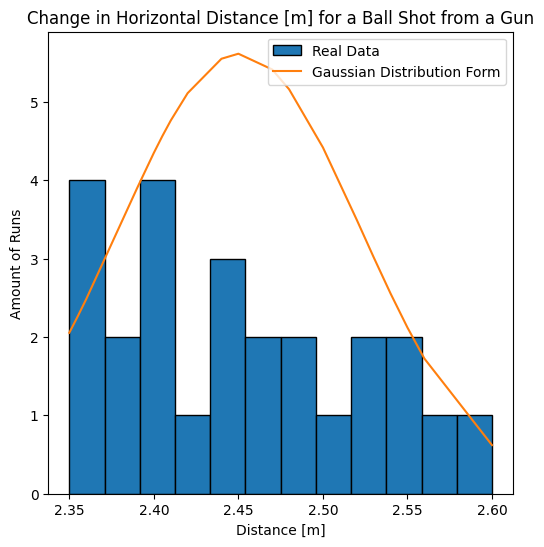

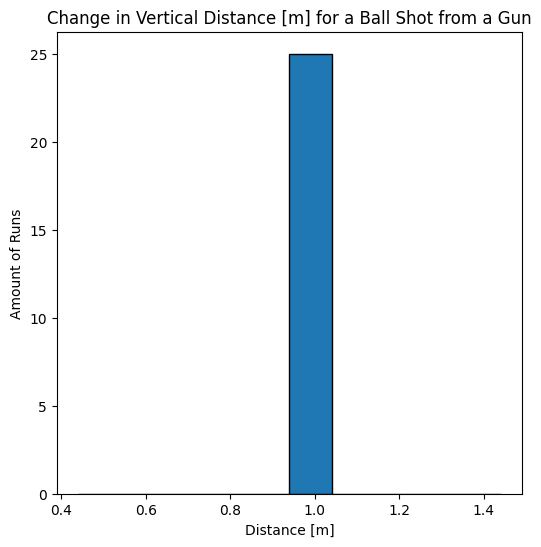

In [58]:
horizontal_d, vertical_d = np.loadtxt('lab7part1data.csv', skiprows=1, unpack=True, delimiter=',')

# we need to calculate the standard deviation for part b. standard deviation is how far is each data from the mean. sqrt(sum((x_i - mean)^2)/N-1)
# first start with the mean and then find the differences from the mean for each data
mean = sum(horizontal_d) / len(horizontal_d)
differences = []
for distance in horizontal_d:
  difference = distance - mean
  differences.append(difference)

sd_part1 = []
sd_part2 = []
standard_dev = []
for difference in differences:
  sd_part1.append(difference**2)
sd_part2 = sum(sd_part1)
standard_dev = np.sqrt(sd_part2 / (len(sd_part1)-1))

# now we can plug into the equation given in part b with x_0 as the mean and sigma as the standard deviation
# we need to sort the data or else the line will be very messy
horizontal_d = sorted(horizontal_d)
plot_b = []
for x in horizontal_d:
  a = standard_dev * math.sqrt(2 * math.pi)
  b = 1 / a
  c = -(x - mean)**2
  d = 2 * standard_dev ** 2
  e = c / d
  plot_b.append(b * math.e**e)

# setting up the axes
fig = plt.figure(figsize=(6,6))
horizontal_d = sorted(horizontal_d)

plt.hist(horizontal_d, bins=12, edgecolor='black', linewidth=1.0, label='Real Data')
plt.plot(horizontal_d, plot_b, label='Gaussian Distribution Form')
plt.title("Change in Horizontal Distance [m] for a Ball Shot from a Gun")
plt.xlabel("Distance [m]")
plt.ylabel("Amount of Runs")
plt.legend(loc=1)
plt.show()


# the distribution of the vertical component would be linear because the standard deviation
# is 0 since the ball always traveled the same vertical distance
fig = plt.figure(figsize=(6,6))
plt.hist(vertical_d, bins=10, edgecolor='black', linewidth=1.0)
plt.title("Change in Vertical Distance [m] for a Ball Shot from a Gun")
plt.xlabel("Distance [m]")
plt.ylabel("Amount of Runs")
plt.show()

In [71]:
# part c
lower = mean - standard_dev
upper = mean + standard_dev
sd1 = []
for x in horizontal_d:
  if x < lower or x > upper:
    sd1.append(x)

print("There are", len(sd1), "point(s) that are 1 standard deviation away from the mean.")
print(f"This is {(len(sd1)/len(horizontal_d)) * 100}% of all the data.")

sd2 = []
for x in horizontal_d:
  if x < (lower - standard_dev) or x > (upper + standard_dev):
    sd2.append(x)

print("There are", len(sd2), "point(s) that are 2 standard deviations away from the mean.")
print(f"This is {(len(sd2)/len(horizontal_d)) * 100}% of all the data.")

There are 9 point(s) that are 1 standard deviation away from the mean.
This is 36.0% of all the data.
There are 1 point(s) that are 2 standard deviations away from the mean.
This is 4.0% of all the data.
